Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps







In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split

In [2]:
# Load data
glass_df=pd.read_csv("glass.csv")
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data Exploration

In [3]:
#checking for null values
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
# checking for duplicate values
glass_df[glass_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [5]:
#droping duplicate data
df=glass_df.copy()
df=glass_df.drop_duplicates()
df.shape

(213, 10)

In [6]:
# Descriptive analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


As we show that silicon mean is heigh as compare top other fetures it means that data are not on same scale.

In [8]:
df['Type'].value_counts().sort_index(ascending=True)

1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

As we show that the Type 1 and 2 alone contain max number of values it means that data is unblanced 

## Exploratory Data Analysis

<Figure size 576x576 with 0 Axes>

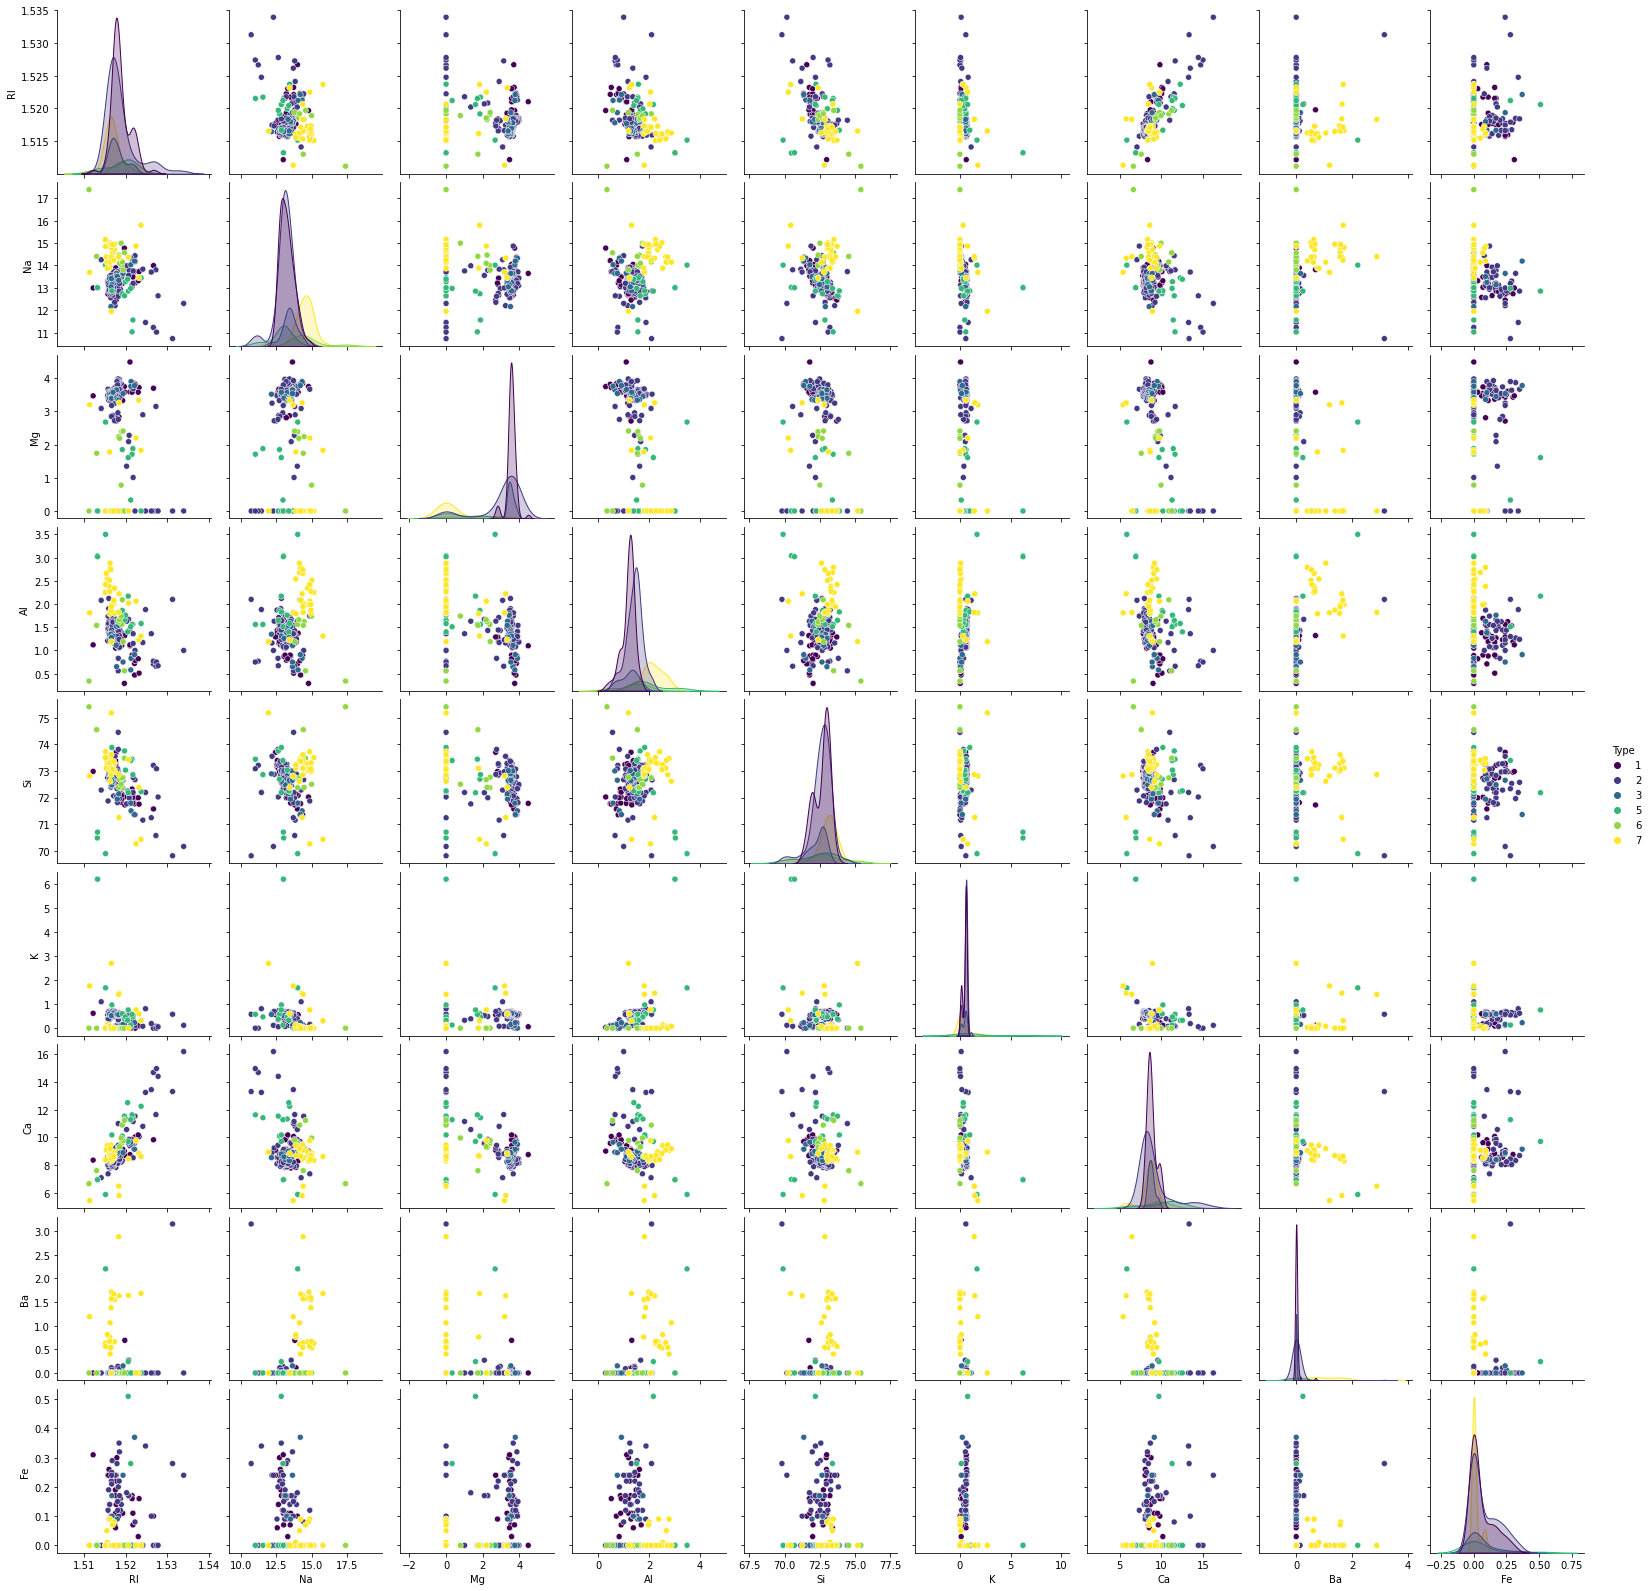

In [9]:
# Correlation Cofficient
plt.figure(figsize=(8,8))
sns.pairplot(df,hue ='Type',palette='viridis')
plt.show()

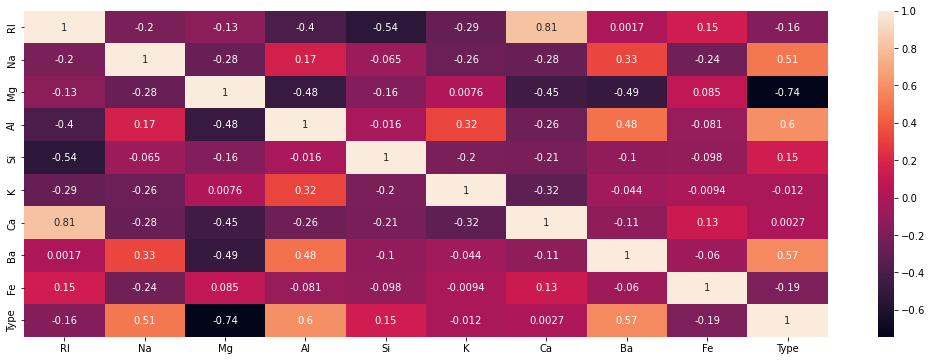

In [10]:
# Heatmap visualization
fig= plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True);

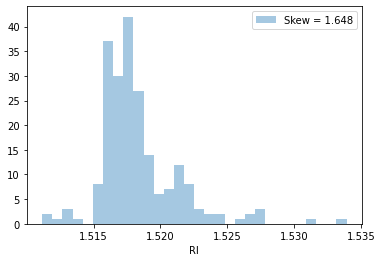

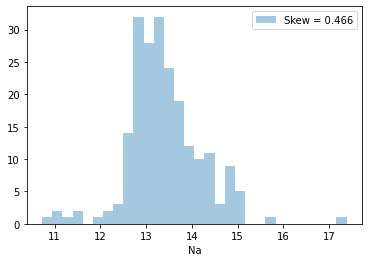

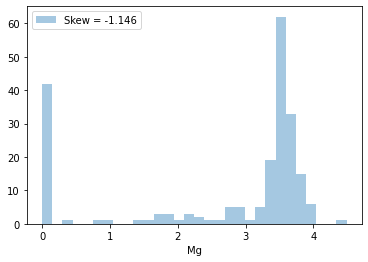

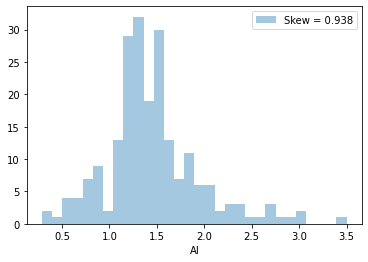

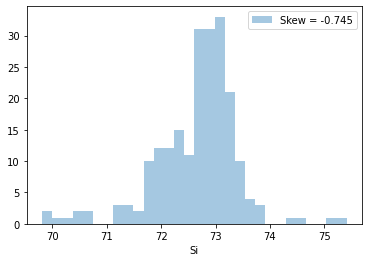

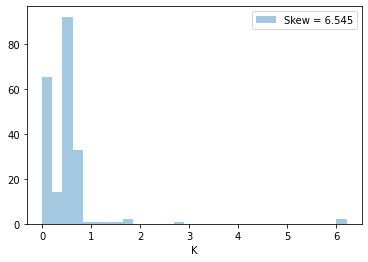

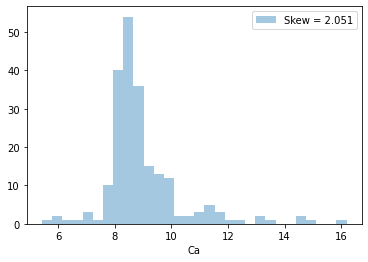

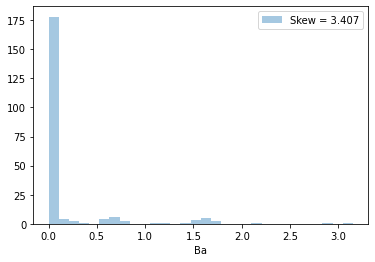

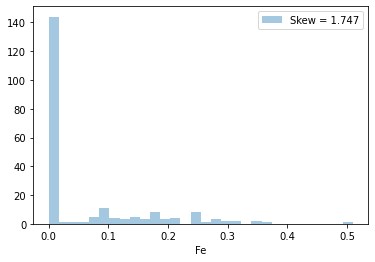

In [11]:
# Histogram visualization 
features = df.columns[:-1].tolist()
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

None of the are normally distributed. Potassium(K), barium(Ba) and calcium(Ca) are highly skewed 

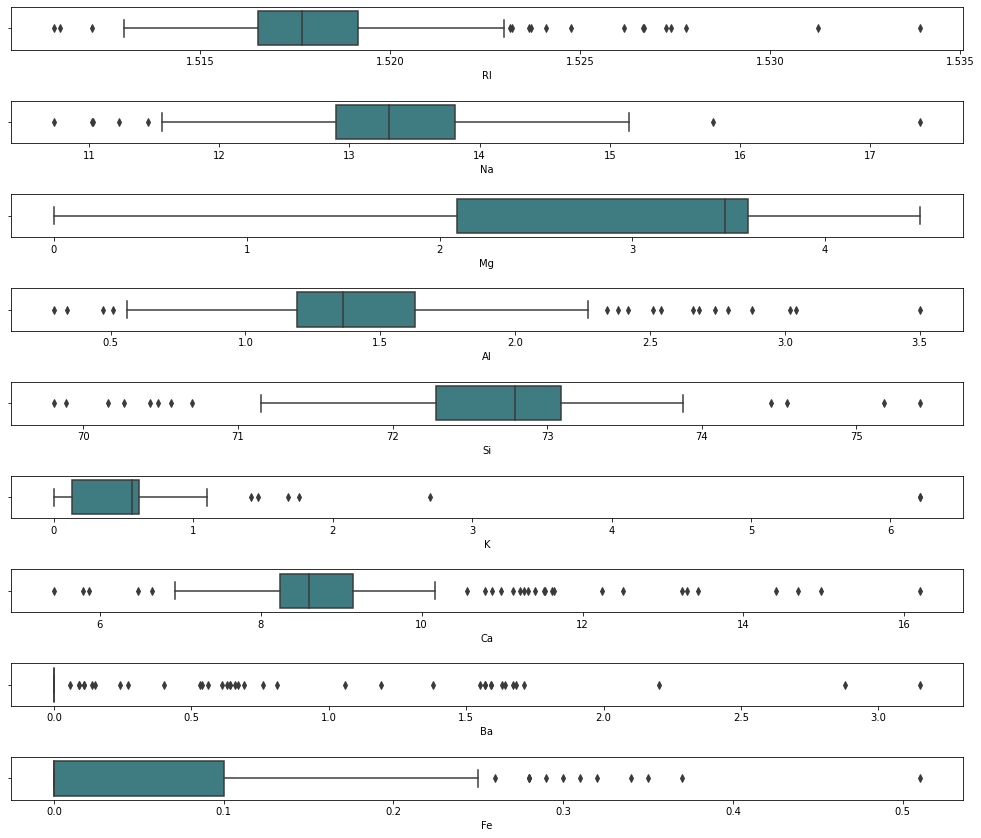

In [12]:
# Checking for outliers
fig, axes=plt.subplots(9,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='RI',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=df,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=df,palette='crest',ax=axes[4])
sns.boxplot(x='K',data=df,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=df,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=df,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=df,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

All features contain outliers except Magnesium(Mg) 

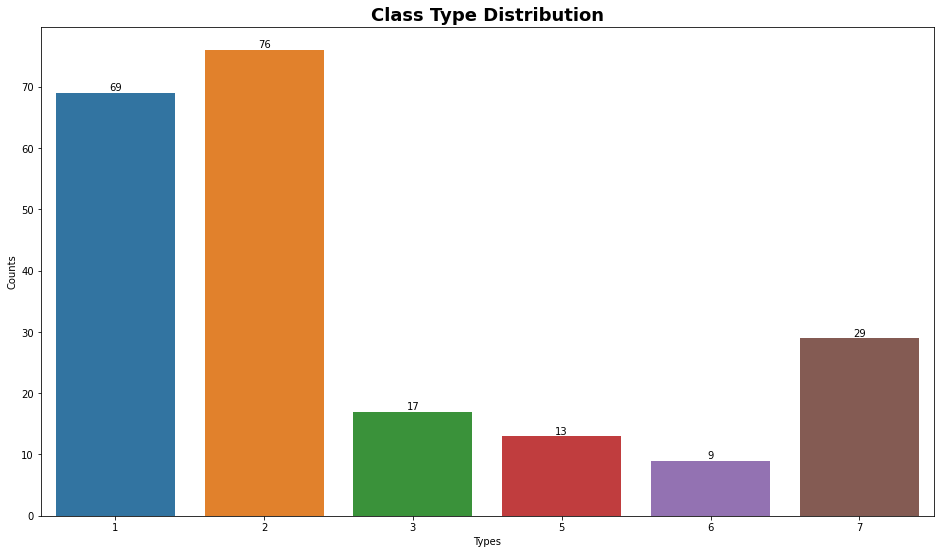

In [13]:
# Bar plot for Type
plt.figure(figsize = (16,9))
ax = sns.barplot(x = df['Type'].value_counts().index.tolist(), y = df['Type'].value_counts().tolist())
plt.title("Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Types')
plt.ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)

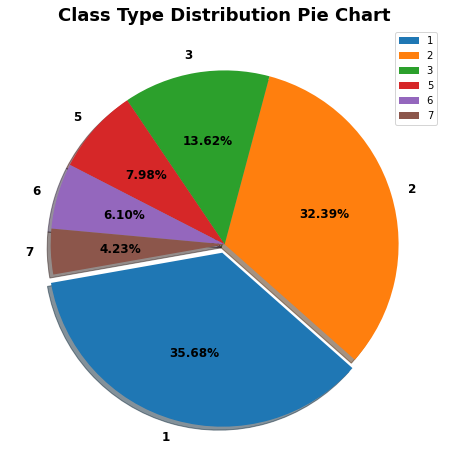

In [14]:
# pie plot for Type
plt.figure(figsize = (12,8))
plt.pie(df['Type'].value_counts(),labels=df.Type.unique(), explode = [0.05,0.0,0.0,0.0,0.0,0.0],autopct= '%.2f%%',shadow= True,
       startangle= 190, textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})

plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Data Pre-Processing

In [15]:
data=df.copy()
#removing outlier
def outlierDetect(col):
    Q1 = np.percentile(col, 25, interpolation = 'midpoint')  
    Q3 = np.percentile(col, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    return low_lim,up_lim

In [16]:
for i in range(2):
    lower,uper=outlierDetect(data[feat])
    data=data[(data[feat]<uper )&(data[feat]>lower)]
    print(data.shape)

(200, 10)
(186, 10)


In [17]:
# Train_test Split
x = data.drop('Type',axis=1)
y = data[['Type']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((130, 9), (130, 1), (56, 9), (56, 1))

In [18]:
# Standardization of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


### Grid search for Choosing the best Value of K

In [19]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [20]:
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn, param_grid=param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [21]:
print(grid.best_score_)
print(grid.best_params_)

0.6615384615384615
{'n_neighbors': 1}


### Visualizing the CV results

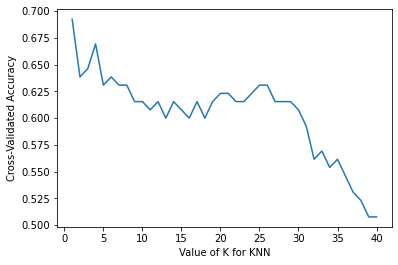

In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [23]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

,0
0,0.692308
3,0.669231
2,0.646154
1,0.638462
5,0.638462
25,0.630769
24,0.630769
4,0.630769
6,0.630769
7,0.630769


Text(0, 0.5, 'Error Rate')

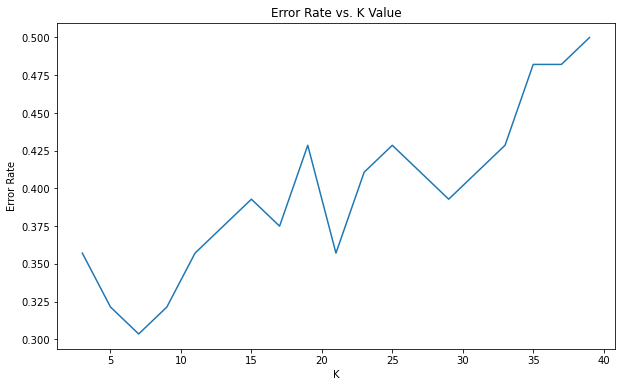

In [24]:

error_rate = []

# Will take some time
k_range = [i for i in range(3,40, 2)]
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(56,1)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot([i for i in range(3,40, 2)],error_rate, markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after K>1 the error rate just tends to hover around 0-0.5 Let's retrain the model with that and check the classification report!

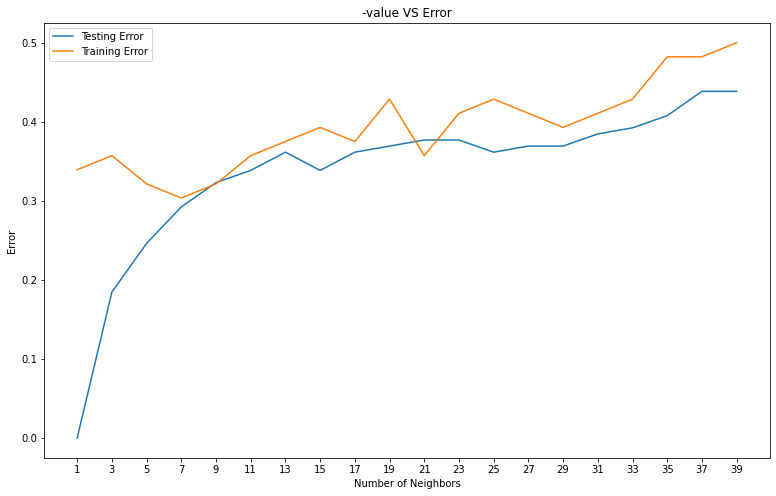

In [25]:
error1= []
error2= []
k_range = [i for i in range(1,40, 2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    y_pred1 = y_pred1.reshape(130,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    y_pred2 = y_pred2.reshape(56,1)
    error2.append(np.mean(y_test!= y_pred2))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('-value VS Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_range)
plt.show()

### train_test  acuracy

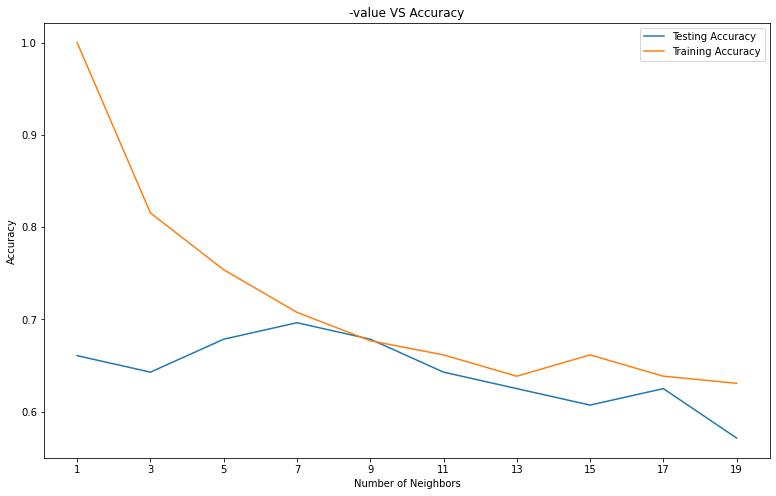

In [26]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(1,20,2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.show()

#### The best value of K is 1

## KNN using k=1

WITH K=1
0.6846153846153846




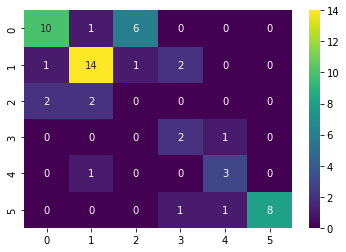



              precision    recall  f1-score   support

           1       0.77      0.59      0.67        17
           2       0.78      0.78      0.78        18
           3       0.00      0.00      0.00         4
           5       0.40      0.67      0.50         3
           6       0.60      0.75      0.67         4
           7       1.00      0.80      0.89        10

    accuracy                           0.66        56
   macro avg       0.59      0.60      0.58        56
weighted avg       0.73      0.66      0.69        56



In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
# using KFold 
kfold = KFold(n_splits=10)
results = cross_val_score(knn, x_train, y_train, cv=kfold)
print(results.mean())
print('\n')
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print('\n')
print(classification_report(y_test,pred))


### Prediction for new data 

In [28]:
p=pd.DataFrame({'RI':2,"Na":15,"Mg":3,'AI':1.29,'Si':72.11,'K':0.44,'Ca':8.00,'Ba':1.02,'Fe':1},index=[0])
p

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe
0,2,15,3,1.29,72.11,0.44,8.0,1.02,1


In [29]:
knn.predict(p)

array([6], dtype=int64)

### Conclusion
+ During building KNN model we shaow that data are not in same sacle so we standardize it, and also data are unbalanced
+ The accuracy of KNN model is greate at k=1
+ By providing new data to our model it gives Type 6. 